In [1]:
import tensorflow as tf 
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt 

import numpy as np 
import pandas as pd 

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3 
EPOCHS = 10

In [3]:
dataset =tf.keras.preprocessing.image_dataset_from_directory(

    'casting_data', 
     shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 7204 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names 
class_names 

['def_front', 'ok_front']

In [5]:
len(dataset)

226

In [6]:
226*32

7232

In [7]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch.shape)
    print(label_batch.numpy()) 

(32, 256, 256, 3)
[0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0]


In [8]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch[0])

tf.Tensor(
[[[213.91406 213.91406 213.91406]
  [213.91406 213.91406 213.91406]
  [213.91406 213.91406 213.91406]
  ...
  [200.      200.      200.     ]
  [200.      200.      200.     ]
  [200.      200.      200.     ]]

 [[213.      213.      213.     ]
  [213.      213.      213.     ]
  [213.      213.      213.     ]
  ...
  [200.      200.      200.     ]
  [200.      200.      200.     ]
  [200.      200.      200.     ]]

 [[213.      213.      213.     ]
  [213.      213.      213.     ]
  [213.      213.      213.     ]
  ...
  [200.      200.      200.     ]
  [200.      200.      200.     ]
  [200.      200.      200.     ]]

 ...

 [[175.      175.      175.     ]
  [175.      175.      175.     ]
  [175.      175.      175.     ]
  ...
  [149.42969 149.42969 149.42969]
  [149.42969 149.42969 149.42969]
  [149.42969 149.42969 149.42969]]

 [[175.      175.      175.     ]
  [175.      175.      175.     ]
  [175.      175.      175.     ]
  ...
  [149.      149.      149.

In [9]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch[0].numpy()) 

[[[118.08594 118.08594 118.08594]
  [118.08594 118.08594 118.08594]
  [118.08594 118.08594 118.08594]
  ...
  [136.      136.      136.     ]
  [136.      136.      136.     ]
  [136.      136.      136.     ]]

 [[119.      119.      119.     ]
  [119.      119.      119.     ]
  [119.      119.      119.     ]
  ...
  [136.      136.      136.     ]
  [136.      136.      136.     ]
  [136.      136.      136.     ]]

 [[119.      119.      119.     ]
  [119.      119.      119.     ]
  [119.      119.      119.     ]
  ...
  [136.      136.      136.     ]
  [136.      136.      136.     ]
  [136.      136.      136.     ]]

 ...

 [[160.      160.      160.     ]
  [160.25781 160.25781 160.25781]
  [161.      161.      161.     ]
  ...
  [166.      166.      166.     ]
  [166.      166.      166.     ]
  [166.      166.      166.     ]]

 [[160.      160.      160.     ]
  [160.25781 160.25781 160.25781]
  [161.      161.      161.     ]
  ...
  [166.      166.      166.     ]
  [1

In [10]:
for image_batch, label_batch in dataset.take(1): 
    print(image_batch[0].shape)

(256, 256, 3)


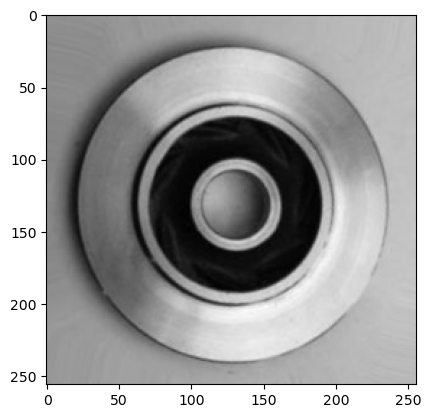

In [11]:
for image_batch,label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    

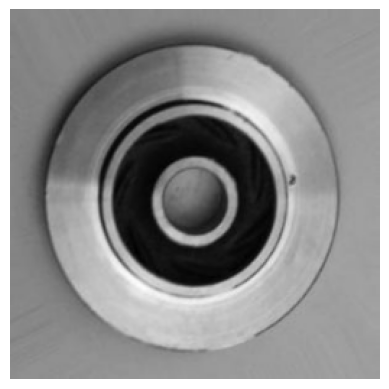

In [12]:
for image_batch, label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.axis('off')

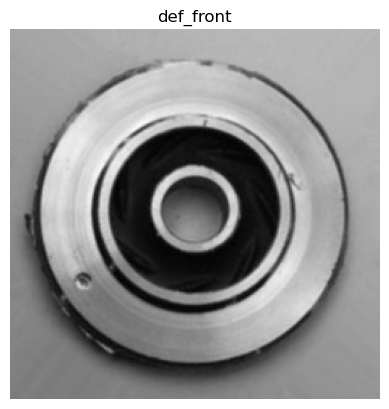

In [13]:
for image_batch,label_batch in dataset.take(1): 
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])
    plt.axis('off')

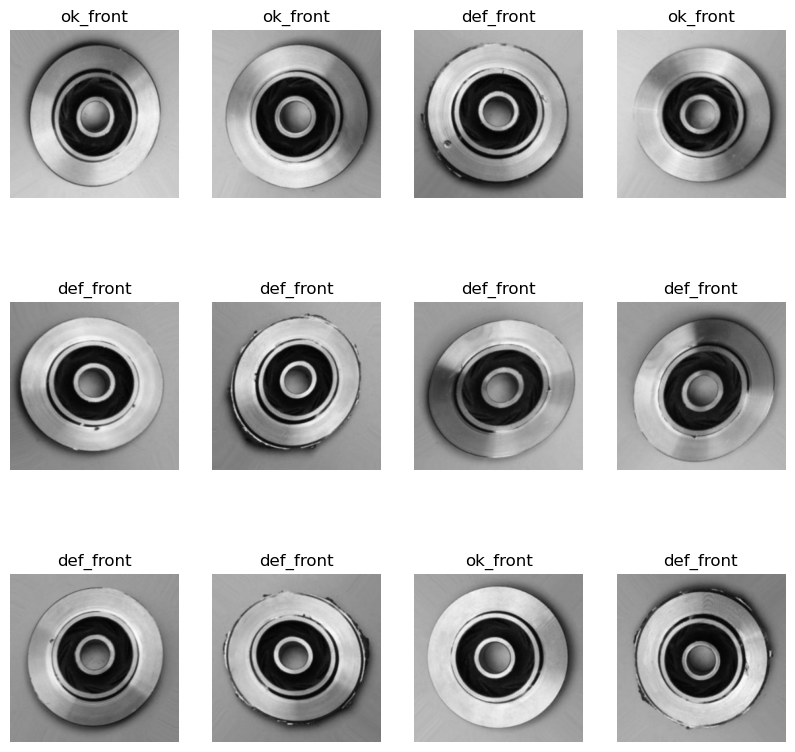

In [14]:
plt.figure(figsize=(10,10)) 
for image_batch, label_batch in dataset.take(1): 
    for i in range(12): 
        ax = plt.subplot(3,4,i+1) 
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]]) 
        plt.axis('off') 



In [15]:
len(dataset)

226

80% ==> training 
20% ==> 10% validation, 10% test

In [16]:
train_size = 0.8
len(dataset)*train_size

180.8

In [17]:
test_ds = dataset.skip(180)
len(test_ds)

46

In [18]:
val_size=0.1 
len(dataset)*val_size

22.6

In [19]:
val_ds = test_ds.take(22)
len(val_ds)

22

In [20]:
test_ds = test_ds.skip(14)
len(test_ds)

32

In [21]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1,
                             shuffle=True, shuffle_size =10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size,seed=12)

    train_size= int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds= ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)

    
    return train_ds, val_ds, test_ds 

In [22]:
train_ds, val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [23]:
len(train_ds)

180

In [24]:
len(val_ds)

22

In [25]:
len(test_ds)

24

In [26]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [27]:
resize_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [28]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])


In [29]:
input_shape=(BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =2


model =models.Sequential([

    resize_and_rescaling,
    data_augmentation,
    layers.Conv2D(32,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3), activation='relu',input_shape=input_shape ),
    layers.MaxPool2D((2,2)),

    layers.Flatten(), 
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),

])

model.build(input_shape=input_shape)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 2304)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │         147,520 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 2)                     │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 277,826 (1.06 MB)

 Trainable params: 277,826 (1.06 MB)

 Non-trainable params: 0 (0.00 B)

# The model.compile() method in Keras is used to configure the model for training. It specifies how the model should optimize the weights during training, how the loss will be calculated, and which metrics to monitor.

In [31]:
model.compile(

optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
metrics=['accuracy'])

# The model.fit() method in Keras is used to train a model. Here's a summary of the arguments used in the code:

train_ds: The dataset used for training the model.
epochs=EPOCHS: The number of times the model will iterate over the entire training dataset.
batch_size=BATCH_SIZE: The number of samples processed at once before updating the model’s weights.
verbose=1: Controls the level of detail shown during training. verbose=1 displays a progress bar and metrics for each epoch.
validation_data=val_ds: A separate dataset used to evaluate the model's performance at the end of each epoch.
The fit() method trains the model and returns a history object containing metrics (like loss and accuracy) for each epoch, which can be used for analysis and plotting.

In [32]:
history = model.fit(

    train_ds, 
    epochs=EPOCHS, 
    batch_size =BATCH_SIZE,
    verbose=1, 
    validation_data=val_ds
)

Epoch 1/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 248s 1s/step - accuracy: 0.6532 - loss: 0.5887 - val_accuracy: 0.8949 - val_loss: 0.2623
Epoch 2/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.8776 - loss: 0.2849 - val_accuracy: 0.9403 - val_loss: 0.1554
Epoch 3/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9354 - loss: 0.1726 - val_accuracy: 0.9602 - val_loss: 0.0996
Epoch 4/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 188s 1s/step - accuracy: 0.9575 - loss: 0.1193 - val_accuracy: 0.9801 - val_loss: 0.0537
Epoch 5/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 189s 1s/step - accuracy: 0.9675 - loss: 0.0877 - val_accuracy: 0.9815 - val_loss: 0.0490
Epoch 6/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 180s 999ms/step - accuracy: 0.9814 - loss: 0.0605 - val_accuracy: 0.9915 - val_loss: 0.0266
Epoch 7/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 5060s 28s/step - accuracy: 0.9888 - loss: 0.0407 - val_accuracy: 0.9886 - val_loss: 0.0317
Epoch 8/10
180/180 ━━━━━━━━━━━━━━━━━━━━ 171s 945ms/step - accuracy: 0.9857 - loss: 0.0368 - 

# Summary of the Model and Training
Model Architecture
The architecture is a Convolutional Neural Network (CNN) with the following components:
Input Shape: 
(32,256,256,3) (batch size of 32, image dimensions of 256x256, and 3 color channels).
Sequential Stages:
Convolutional Layers: Extract features from input images. Filters are doubled after every pooling operation (from 32 to 64).
MaxPooling Layers: Down-sample the spatial dimensions while retaining significant features.
Flatten Layer: Converts 3D outputs into a 1D vector.
Dense Layers: Fully connected layers for classification:
2304→64
2304→64: Feature reduction and abstraction.
64→2
64→2: Output layer for binary classification.
Total Parameters: 
277,826,277,826 (all trainable).

In [33]:
scores = model.evaluate(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 52s 594ms/step - accuracy: 0.9977 - loss: 0.0087


## The model.evaluate(test_ds) function is used to evaluate the trained model on the test dataset. In this case, the model achieves the following results:

Accuracy: 99% , indicating that the model correctly classified all test images.
Loss: 0.0087, which is a very low value, suggesting that the model's predictions are very close to the true labels.
This result indicates that the model has generalized well and performs exceptionally well on the unseen test dataset, showing no signs of overfitting.

In [34]:
scores

[0.00986537802964449, 0.9973958134651184]

In [35]:
history

In [36]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# visualize the training and validation accuracy and loss over epochs in a single figure with two subplots

Text(0.5, 1.0, 'Training and Validation Accuracy')

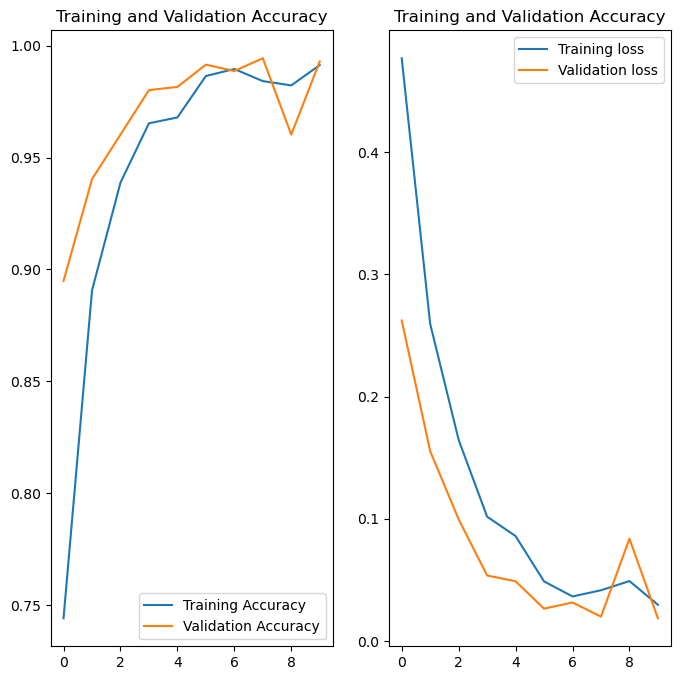

In [38]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")

plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")


plt.subplot(1,2,2)
plt.plot(range(EPOCHS), loss, label = "Training loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation loss")

plt.legend(loc = 'upper right')
plt.title("Training and Validation Accuracy")

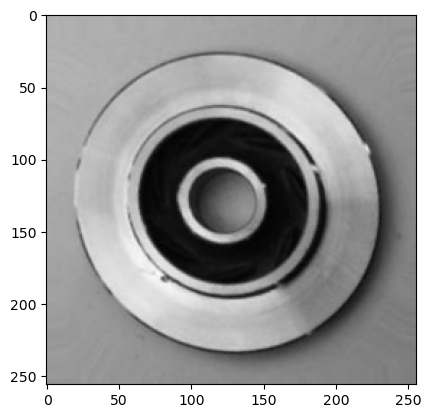

In [39]:
for image_batch, label_batch in test_ds.take(1):

    plt.imshow(image_batch[0].numpy().astype("uint8"))


first iamge to predict
first iamge's actual label: def_front
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
predicted label: def_front


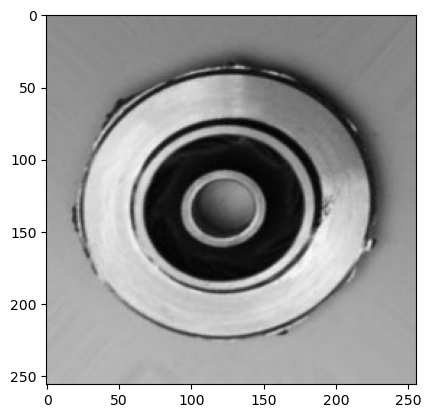

In [40]:
import numpy as np 
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]

    print("first iamge to predict")
    plt.imshow(first_image)

    print("first iamge's actual label:",class_names[ first_label])

    batch_prediction = model.predict(image_batch)
    print("predicted label:" ,class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


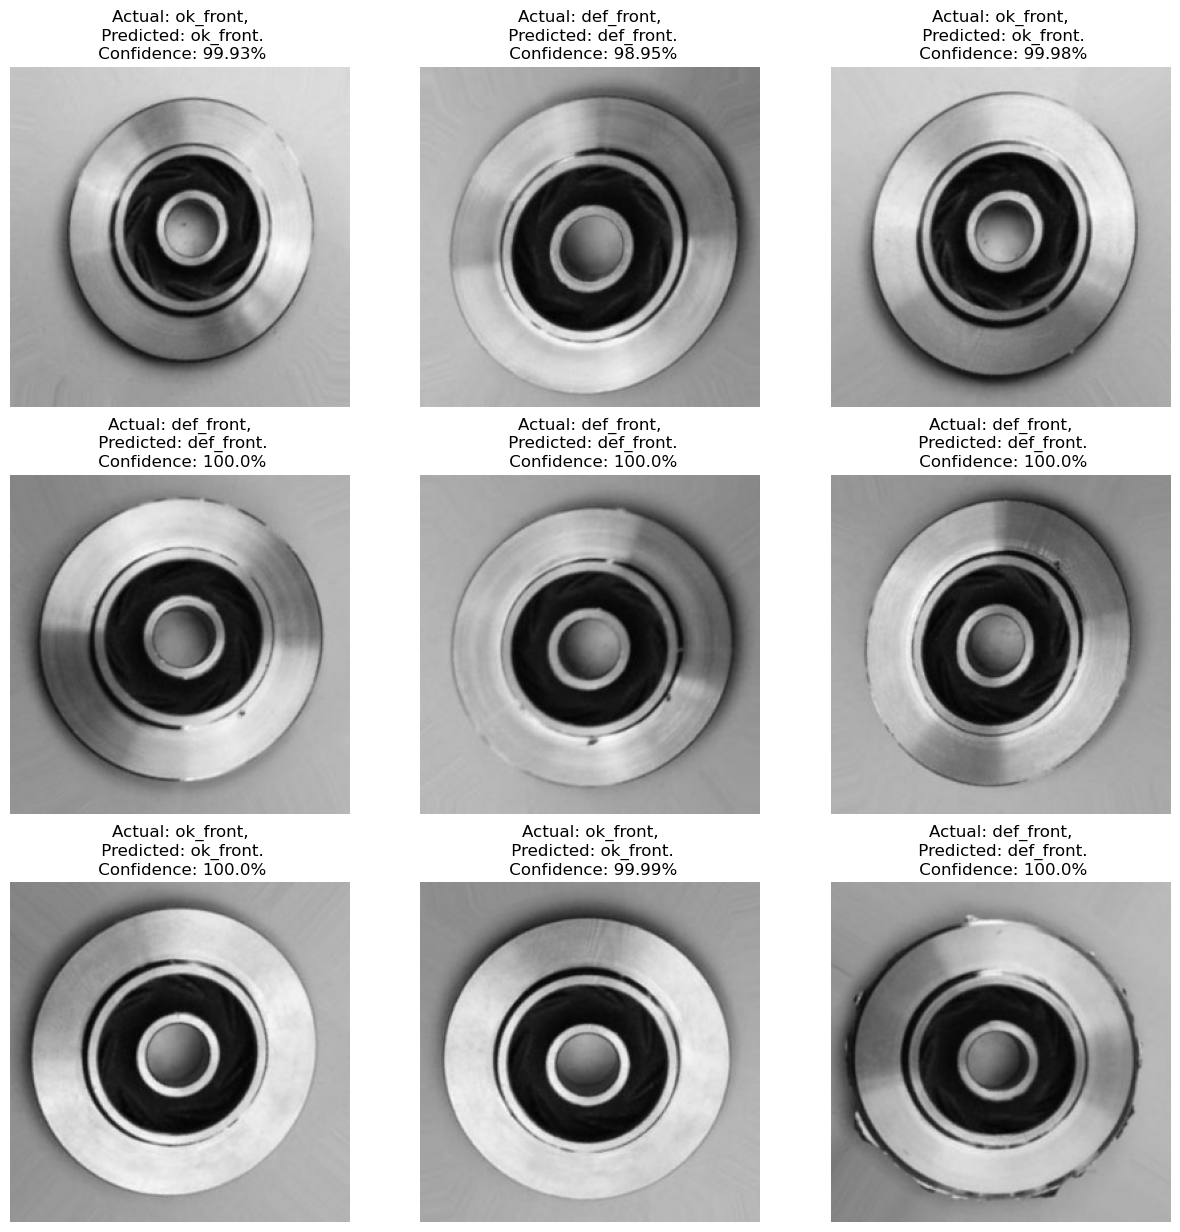

In [42]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## Visuals:

The images appear to be close-up photos of a mechanical component. The predicted labels (e.g., "def front" and "ok front") likely correspond to images with or without defects on the front surface.

## Overall Impression:

The model seems to be performing very well based on the high confidence levels and matching predictions, The visual inspection alongside these labels suggests the model is able to classify the images with high accuracy.

# 3. Calculate Metrics

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

# Extract true labels and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    batch_predictions = model.predict(images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)
    y_pred.extend(batch_predicted_labels)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Confusion matrix
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
Classification Report:
              precision    recall  f1-sco

# . Visualize the Confusion Matrix

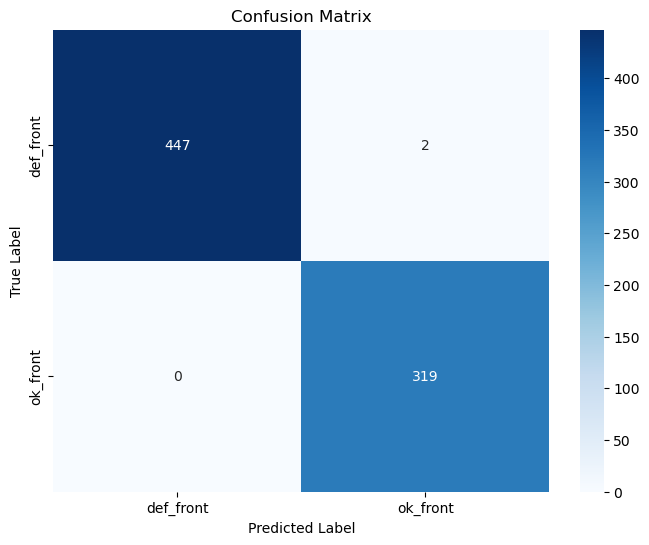

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Classification Metrics reportm:
Precision, Recall, F1-Score:
def_front: Perfect precision (1.00), recall (1.00), and F1-score (1.00). Only 2 samples misclassified.
ok_front: Nearly perfect precision (0.99), recall (1.00), and F1-score (1.00).
Overall Accuracy: 100% across the validation dataset of 768 samples.
Macro and Weighted Averages: Both metrics show an average F1-score of 1.00, indicating consistent performance across both classes.
Confusion Matrix:
def_front:
447 correctly classified, 2 misclassified as ok_front.
ok_front:
All 319 samples correctly classified.
This highlights exceptional performance, with only two minor misclassifications.

# 5. Additional Metrics
Manually compute precision, recall, and F1-score if needed.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step
Classification Report:
              precision    recall  f1-sco

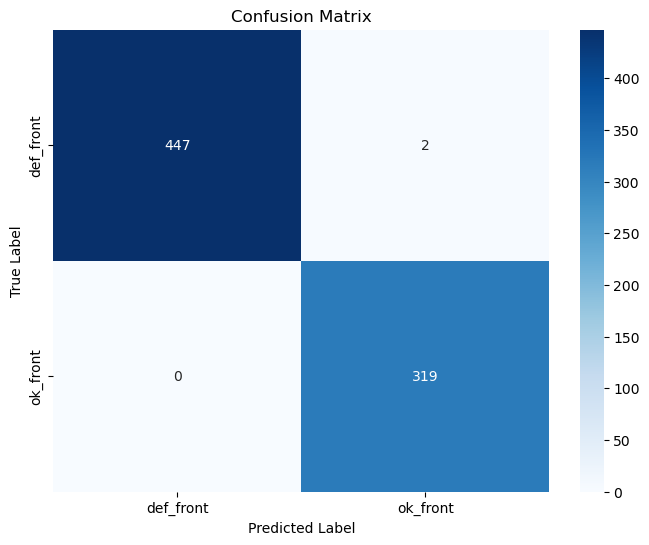

In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extract true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    y_true.extend(labels.numpy())
    batch_predictions = model.predict(images)
    batch_predicted_labels = np.argmax(batch_predictions, axis=1)
    y_pred.extend(batch_predicted_labels)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


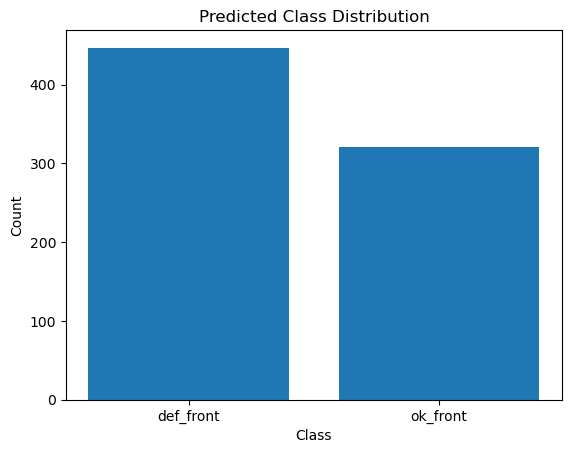

In [46]:
import matplotlib.pyplot as plt
from collections import Counter

class_counts = Counter(y_pred)
plt.bar(class_names, [class_counts[i] for i in range(len(class_names))])
plt.title("Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


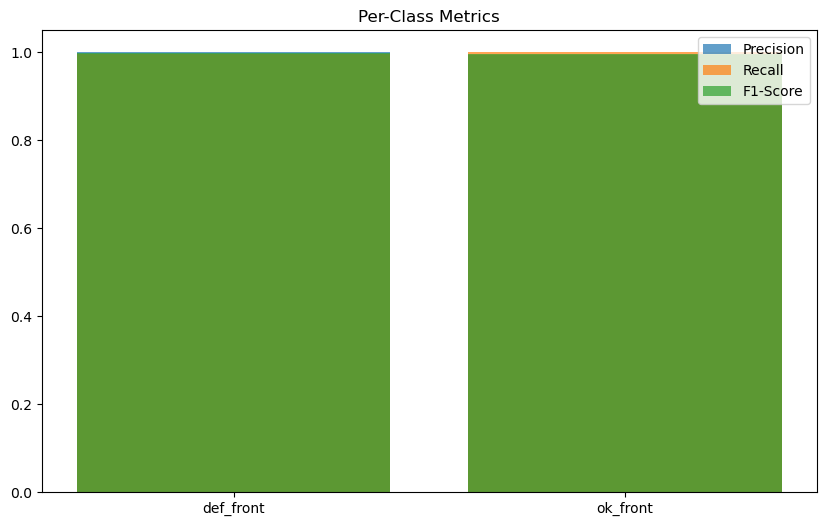

In [47]:
from sklearn.metrics import precision_recall_fscore_support
metrics = precision_recall_fscore_support(y_true, y_pred, labels=range(len(class_names)))

plt.figure(figsize=(10, 6))
for i, metric in enumerate(["Precision", "Recall", "F1-Score"]):
    plt.bar(class_names, metrics[i], label=metric, alpha=0.7)
plt.title("Per-Class Metrics")
plt.legend()
plt.show()


24/24 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step


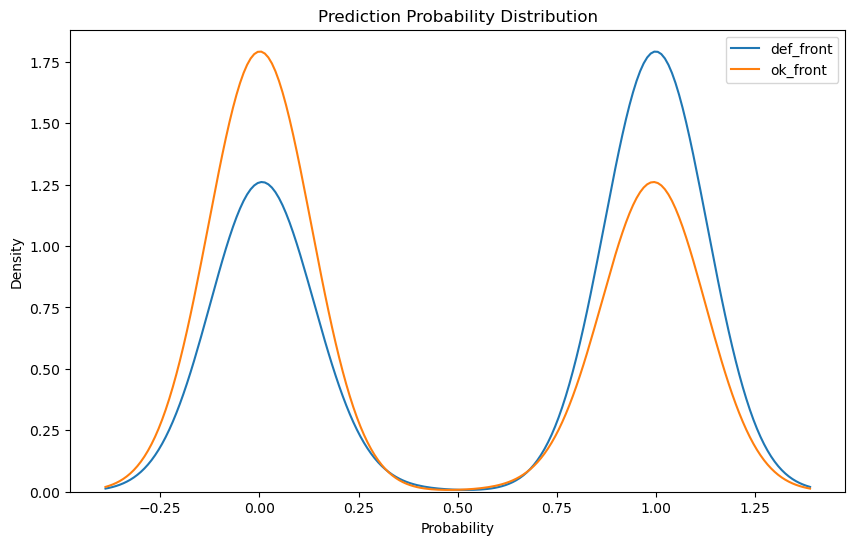

In [48]:
import seaborn as sns
probabilities = model.predict(test_ds)  # Shape: (num_samples, num_classes)

plt.figure(figsize=(10, 6))
for i in range(len(class_names)):
    sns.kdeplot(probabilities[:, i], label=f"{class_names[i]}")

plt.title("Prediction Probability Distribution")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.legend()
plt.show()


# Key Insights:
### High Model Accuracy: 
The near-perfect classification is evidence of a well-trained model with excellent generalization.
### Minor Misclassifications: 
The 2 samples misclassified as ok_front could be borderline cases or data with some ambiguity.
### Balanced Performance: 
Both classes are well-represented and classified with high accuracy, reducing the risk of bias.